In [134]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [135]:
import sys
sys.version

'3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]'

In [136]:
tf.__version__

'2.15.0'

In [137]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [138]:
# if the below value is true,
# then we can use GPU
# in our deeplearning job
tf.test.is_built_with_cuda()

True

CIFARD-10 Dataset
This dataset consists of 10000 32*32 colour images in 10, classes, with 6000 images per class. There are 50000 training images and 10000 test images.

the dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

In [139]:
# lets load our dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

In [140]:
X_train.shape
# the value 3 in the output tells
# the values of RGB colours in one pixel

(50000, 32, 32, 3)

In [141]:
# dimnsion of first image
X_train[0].shape

(32, 32, 3)

In [142]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [143]:
y_train.shape

(50000, 1)

In [144]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [145]:
def plot_sample(index):
  plt.figure(figsize=(10,1))
  plt.imshow(X_train[index]) # imshow is image show function

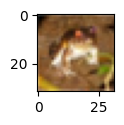

In [146]:
plot_sample(0)

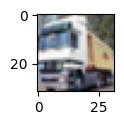

In [147]:
plot_sample(1)

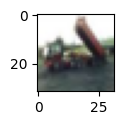

In [148]:
plot_sample(2)

In [149]:
# the below list is created for conveinience
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

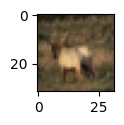

In [150]:
plot_sample(3)

In [151]:
y_train[3]


array([4], dtype=uint8)

In [152]:
# the target or the output is in interger but we need it
# in human understandable form
classes[y_train[3][0]]

'deer'

In [153]:
# let's scale the images now
# only after scaling the model tends to perform better

X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [154]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [155]:
# Lets perform one hot encoding

In a nutshell, it converts categorical variables into a binary vector representation where each category is mapped to a binary value.

Here's an example to illustrate:

Let's say you have a categorical variable "Color" with three categories: Red, Green, and Blue. One-hot encoding would represent each category as a binary vector:

Red: [1, 0, 0]
Green: [0, 1, 0]
Blue: [0, 0, 1]


Each category gets a binary representation where one element is 1 (indicating the presence of that category) and the rest are 0s.

In [156]:
test = ['a','b', 'c', 'd', 'e', 'a', '5']

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
test = encoder.fit_transform(test)

print(test)

test_categorical = keras.utils.to_categorical(
    test, num_classes=6, dtype='float32'
)

test_categorical

[1 2 3 4 5 1 0]


array([[0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]], dtype=float32)

In [157]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [158]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)
y_train_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [159]:
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float64'
)

y_test_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [160]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [161]:
X_train_flatten = X_train.reshape(len(X_train), 32*32*3)
X_train_flatten[0][:9]

array([59, 62, 63, 43, 46, 45, 50, 48, 43], dtype=uint8)

In [162]:
input_layer_size = 32*32*3
input_layer_size

3072

In [163]:
y_train[:5]
# 'sparse_categorical_crossentropy' loss is used for the below
# data type

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [164]:
y_train_categorical[:5]
# 'categorical_entropy' is used for the below data type

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [165]:
# the number of neurons in the input layer is givern
# by the trail and error method
# and if we have more hidden layers
# then the model would be more efficient in prediction
# And 'relu' is the most preferred activation function


model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation="relu"),
    keras.layers.Dense(1000, activation="relu"),
    keras.layers.Dense(10, activation="sigmoid")
])


# stocastic gradient descent is used as the
# optimizer because the dataset is quite big
# 'sparse_categorical_entropy' is used when
# the output value is discrete
# And 'categorical_crossentropy' is used when
# the outpu value is a binary vector because of one-hot encoding

model.compile(
    optimizer="SGD",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(X_train_scaled, y_train_categorical,epochs=50)

Epoch 1/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8094 - accuracy: 0.3551
Epoch 2/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6180 - accuracy: 0.4294
Epoch 3/50
1563/1563 [==============================] - 9s 5ms/step - loss: 1.5388 - accuracy: 0.4564
Epoch 4/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4800 - accuracy: 0.4791
Epoch 5/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4295 - accuracy: 0.4969
Epoch 6/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3869 - accuracy: 0.5122
Epoch 7/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3501 - accuracy: 0.5212
Epoch 8/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3124 - accuracy: 0.5388
Epoch 9/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2830 - accuracy: 0.5491
Epoch 10/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.252

In [166]:
model.predict(X_test_scaled)

313/313 [==============================] - 1s 2ms/step


array([[1.3012619e-01, 8.1948376e-01, 8.4454876e-01, ..., 5.2439264e-04,
        8.9191437e-01, 5.3601873e-01],
       [4.9960223e-01, 9.9996257e-01, 3.4396697e-02, ..., 1.2875616e-02,
        9.9999475e-01, 9.9884760e-01],
       [9.9060094e-01, 9.9391729e-01, 5.6078788e-02, ..., 9.6956909e-01,
        9.9722385e-01, 9.8953593e-01],
       ...,
       [2.7793059e-01, 1.0053418e-02, 9.7963929e-01, ..., 3.6803412e-01,
        5.0057381e-01, 2.1649359e-02],
       [1.0996223e-01, 3.2700616e-01, 7.5353676e-01, ..., 7.0024908e-02,
        3.0924794e-01, 2.5733799e-01],
       [2.0628245e-01, 8.8122830e-02, 8.3951545e-01, ..., 9.9231863e-01,
        4.6220896e-01, 1.1256260e-01]], dtype=float32)

In [167]:
model.predict(X_test_scaled)[1]

313/313 [==============================] - 1s 2ms/step


array([0.49960223, 0.99996257, 0.0343967 , 0.00300766, 0.03777291,
       0.00126423, 0.00669187, 0.01287562, 0.99999475, 0.9988476 ],
      dtype=float32)

In [168]:
classes[np.argmax(model.predict(X_test_scaled)[2])]

313/313 [==============================] - 1s 2ms/step


'ship'

In [169]:
classes[y_test[2][0]]

'ship'

In [170]:
classes[np.argmax(model.predict(X_test_scaled)[1])]

313/313 [==============================] - 1s 2ms/step


'ship'

In [171]:
classes[y_test[1][0]]

'ship'

In [172]:
classes[np.argmax(model.predict(X_test_scaled)[1])]

313/313 [==============================] - 1s 2ms/step


'ship'

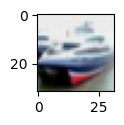

In [173]:
plt.figure(figsize=(10,1))
plt.imshow(X_test[1])

In [174]:
classes[y_test[3][0]]

'airplane'

In [177]:
classes[np.argmax(model.predict(X_test_scaled)[3])]

313/313 [==============================] - 1s 2ms/step


'airplane'